<a href="https://colab.research.google.com/github/JamieMartin3/Part-II-Physics-Simulations/blob/main/Problem_1_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Core Task 1:
Solve the second order differential equation, plotting for different numbers of oscillations as well as the expected theoretical result for small oscillations, test how well it conserve energy, then compare time periods for different starting values of theta

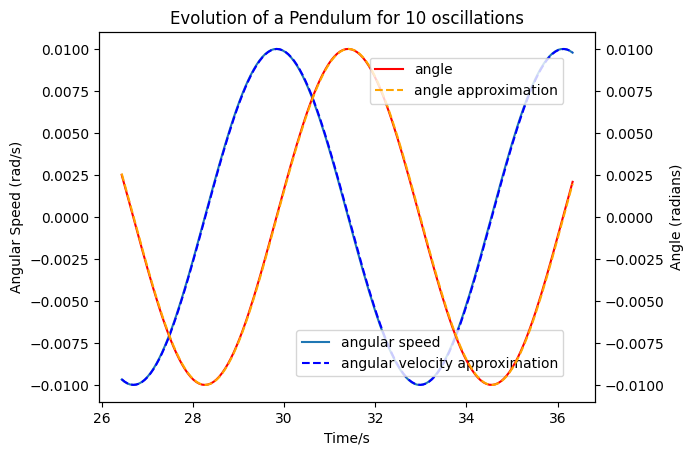

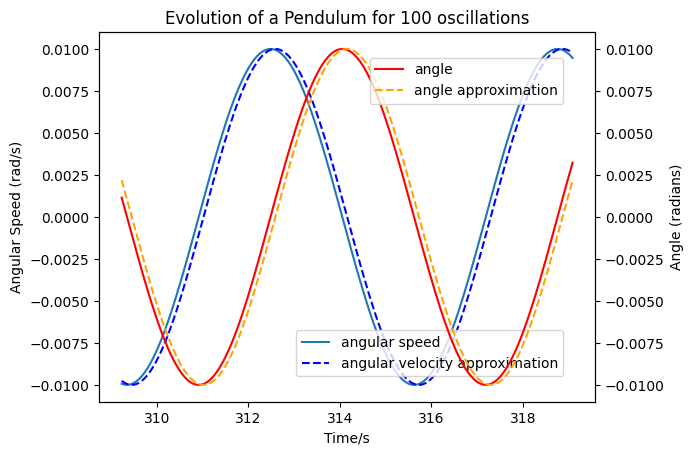

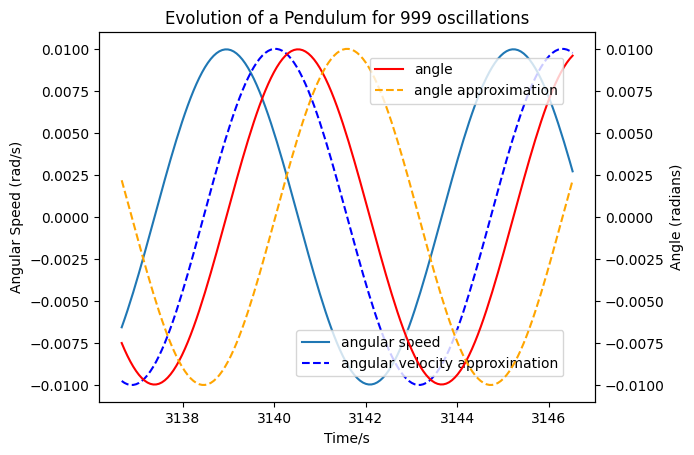

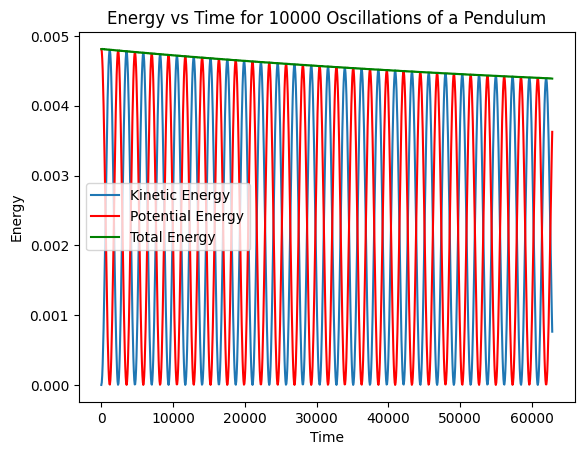

NameError: name 'quad' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from scipy.signal import find_peaks


def derivatives(t, y, q, F, omega_0):
  """
  Return derivatives for the pendulum equation at t, y

  The equation is
    d^2 theta/dt^2 = -g/l*sin(theta)-q*d theta/dt+F*sin(Omega_D*t)
  working in the transformed y[0] = theta, y[1] = d(theta)/dt, where g=l
  """
  return [y[1], -np.sin(y[0])-q*y[1]+F*np.sin(omega_0*t)]

omega=2/3
y_amplitude = 0.01
mass = 1
length = 9.81
F = 0

def sol(y_amp, t_in, t_steps):
  solution = scipy.integrate.solve_ivp(
      fun=derivatives,
      t_span=(0,t_in),
      y0=(y_amp, 0.0),
      args=(0.0, 0.0, omega,),
      t_eval=np.linspace(0, t_in, t_steps),
  )
  x, y, dydx = solution.t, solution.y[0], solution.y[1]
  return x, y, dydx

inputs = [10*2*np.pi, 100*2*np.pi, 1000*2*np.pi]

results = [sol(y_amplitude, t, int(100*t/(2*np.pi))) for t in inputs]

for i, (x, y, dydx) in enumerate(results):
  fig, ax1 = plt.subplots()

  middle_idx = len(x) // 2

  time_span = x[-1] - x[0]

  indices_for_interval = int(5 / time_span * len(x))

  start_idx = max(middle_idx - indices_for_interval, 0)
  end_idx = min(middle_idx + indices_for_interval, len(x))


  x_section = x[start_idx:end_idx]
  y_section = y[start_idx:end_idx]
  dydx_section = dydx[start_idx:end_idx]

  ax1.plot(x_section, dydx_section, label="angular speed")
  ax1.plot(x_section, -y_amplitude*np.sin(x_section), label="angular velocity approximation", color = 'b', linestyle='--')
  ax1.set_xlabel("Time/s")
  ax1.set_ylabel("Angular Speed (rad/s)")
  ax1.set_title(f"Evolution of a Pendulum for {int(inputs[i]/(2*np.pi))} oscillations")
  ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.05))

  ax2 = ax1.twinx()
  ax2.plot(x_section, y_section, label="angle", color="r")
  ax2.plot(x_section, y_amplitude*np.cos(x_section), label="angle approximation", linestyle='--', color="orange")
  ax2.set_ylabel("Angle (radians)")
  ax2.legend(loc="upper right", bbox_to_anchor=(0.95, 0.95))

plt.show()


x_energy, y_energy, dydx_energy = sol(y_amplitude, 10000*2*np.pi, 1000)
kinetic_energy = 0.5 * mass * (length * dydx_energy)**2
potential_energy = 9.81 * mass * length * (1 - np.cos(y_energy))

total_energy = kinetic_energy + potential_energy

fig, ax1 = plt.subplots()
plt.plot(x_energy, kinetic_energy, label='Kinetic Energy')
plt.plot(x_energy, potential_energy, label='Potential Energy', color="red")
plt.plot(x_energy, total_energy, label='Total Energy', color="green")
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.title('Energy vs Time for 10000 Oscillations of a Pendulum')
plt.show()

def calculate_time_period(y_amp, y_amp_0):
    value = np.cos(y_amp) - np.cos(y_amp_0)

    if value < 1e-5:
        return np.inf

    return 4 * np.sqrt(1 / 2) / np.sqrt(np.abs(value))

y_amplitudes = np.linspace(0.01, np.pi, 1000)
initial_amplitudes = []
mean_time_periods = []

for y_amp_0 in y_amplitudes:
    result,_ = quad(calculate_time_period, 0, y_amp_0, args)
    initial_amplitudes.append(y_amp_0)
    mean_time_periods.append(result)

fig, ax1 = plt.subplots()
plt.plot(initial_amplitudes, mean_time_periods, linestyle = '-')
plt.xlabel('Initial Amplitude')
plt.ylabel('Mean Time Period')
plt.title('Time Period vs Initial Amplitude for a Pendulum')


print(f"The time period for when the amplitude is pi/2 is {mean_time_periods[500]} seconds")


In this exercise I have solved the differential equation for SHM, and shown different numbers of periods on a graph. At small times the theoretical  and calculated solutions match, however as time increases they stray further apart, since the small angle approximation stops working.
I have shown that in my solution, energy is slowly leaked, this would be due to rounding errors in my solution.
I have also shown a plot of time period against initial amplitude.

# Core Task 2:

Plot and investigate the solution for various levels of damping and force applied.  Investigate what happens to the time period

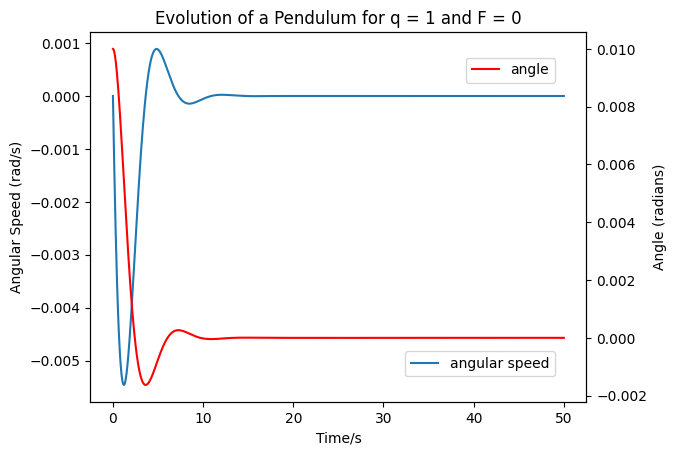

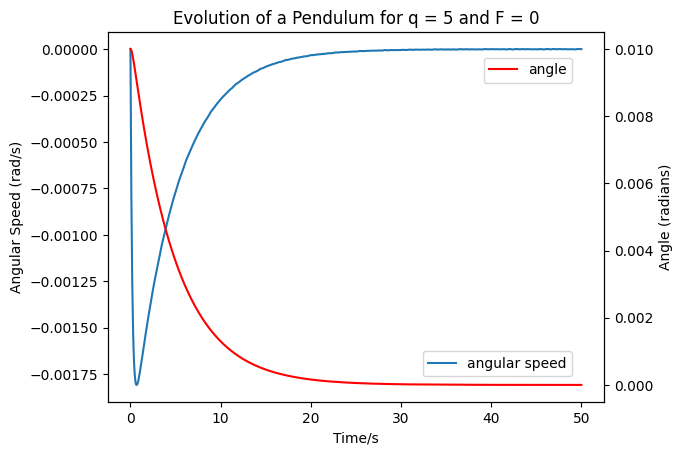

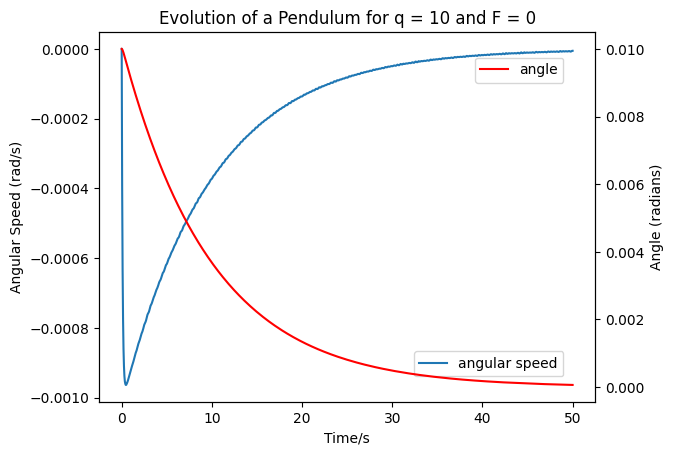

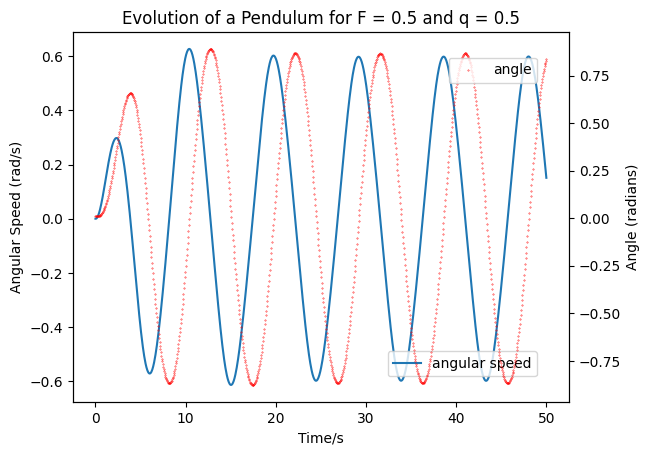

The mean time period for F=0.5 is 9.14914914914915 seconds


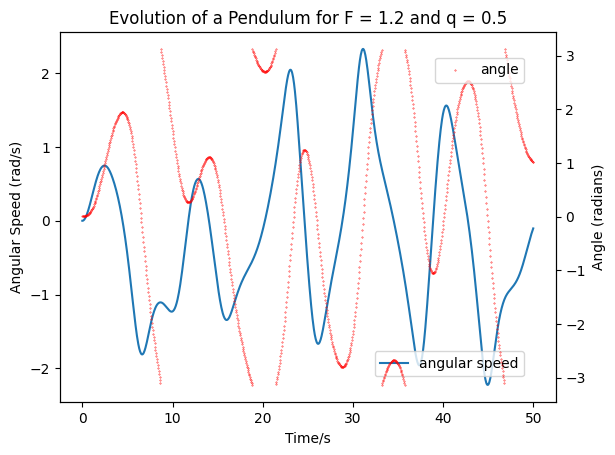

The mean time period for F=1.2 is 7.577577577577577 seconds


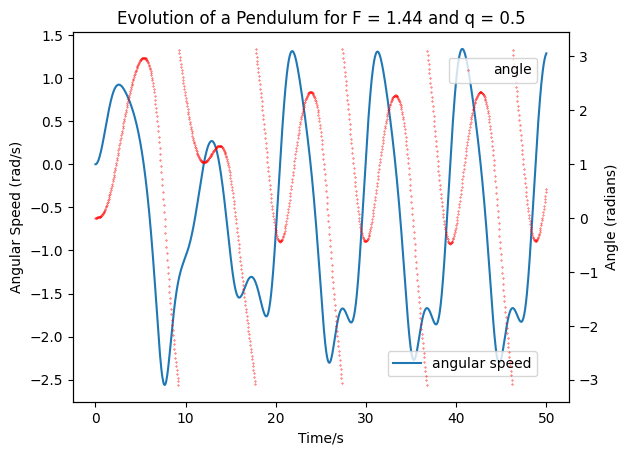

The mean time period for F=1.44 is 5.455455455455455 seconds


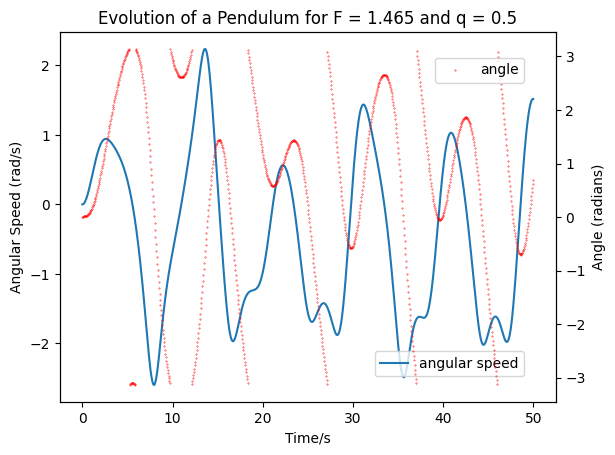

The mean time period for F=1.465 is 6.170456170456171 seconds


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from scipy.signal import find_peaks

def derivatives(t, y, q, F, omega_0):
    """
    Return derivatives for the pendulum equation at t, y

    The equation is
    d^2 theta/dt^2 = -g/l*sin(theta)-q*d theta/dt+F*sin(Omega_D*t)
    working in the transformed y[0] = theta, y[1] = d(theta)/dt, where g=l
    """
    return [y[1], -np.sin(y[0])-q*y[1]+F*np.sin(omega_0*t)]

omega = 0.6667
y_amplitude = 0.01

def calculate_time_period(x, dydx):
    peaks, _ = find_peaks(dydx)
    time_periods = np.diff(x[peaks])
    mean_time_period = np.mean(time_periods)
    return mean_time_period

def sol(y_amp, t_in, q_input, F_input):
    solution = scipy.integrate.solve_ivp(
        fun=lambda t, y: derivatives(t, y, q_input, F_input, omega),
        t_span=(0, t_in),
        y0=(y_amp, 0.0),
        t_eval=np.linspace(0, t_in, 1000),
    )
    x, y, dydx = solution.t, solution.y[0], solution.y[1]

    y = np.unwrap(y)

    y = np.mod(y + np.pi, 2 * np.pi) - np.pi

    return x, y, dydx

q_input = [1, 5, 10]
F_input = 0.0

for q in q_input:
    x, y, dydx = sol(y_amplitude, 50, q, F_input)
    fig, ax1 = plt.subplots()
    ax1.plot(x, dydx, label="angular speed")
    ax1.set_xlabel("Time/s")
    ax1.set_ylabel("Angular Speed (rad/s)")
    ax1.set_title(f"Evolution of a Pendulum for q = {q} and F = 0")
    ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.05))
    ax2 = ax1.twinx()  # Use second set of axes for angular position
    ax2.plot(x, y, label="angle", color="red")
    ax2.set_ylabel("Angle (radians)")
    ax2.legend(loc="upper right", bbox_to_anchor=(0.95, 0.95))
    plt.show()

F_input = [0.5, 1.2, 1.44, 1.465]
q_input = 0.5

for F in F_input:
    x, y, dydx = sol(y_amplitude, 50, q_input, F)
    fig, ax1 = plt.subplots()
    ax1.plot(x, dydx, label="angular speed")
    ax1.set_xlabel("Time/s")
    ax1.set_ylabel("Angular Speed (rad/s)")
    ax1.set_title(f"Evolution of a Pendulum for F = {F} and q = 0.5")
    ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.05))
    ax2 = ax1.twinx()  # Use second set of axes for angular position
    ax2.scatter(x, y, label="angle", color="red", s=0.1)
    ax2.set_ylabel("Angle (radians)")
    ax2.legend(loc="upper right", bbox_to_anchor=(0.95, 0.95))
    plt.show()
    mean_time_period = calculate_time_period(x, dydx)
    print(f"The mean time period for F={F} is {mean_time_period} seconds")


From these 7 plots, you can see that the rate at which the pendulum goes to zero is faster until q = 5, then slower, as shown in q = 10. The time period varies a lot as F changes.

# Supplementary Task 1:

Investigate sensitivity to initial conditions


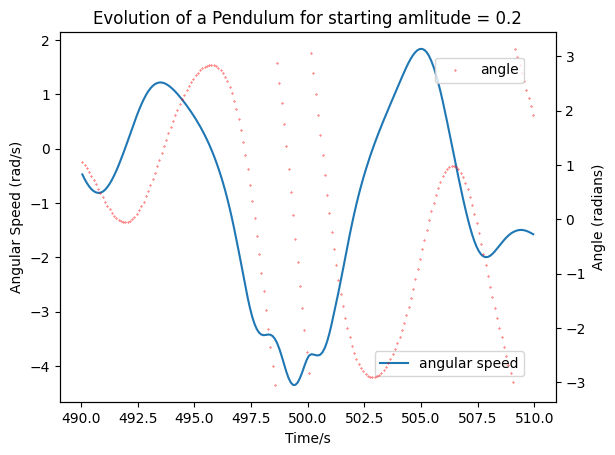

<ipython-input-39-24298f5fcab4>:53: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(lambda t: np.interp(t, x, y), lower_limit, upper_limit)


Result of integration over a long time for starting amplide of 0.2 is 1.7261116621413968


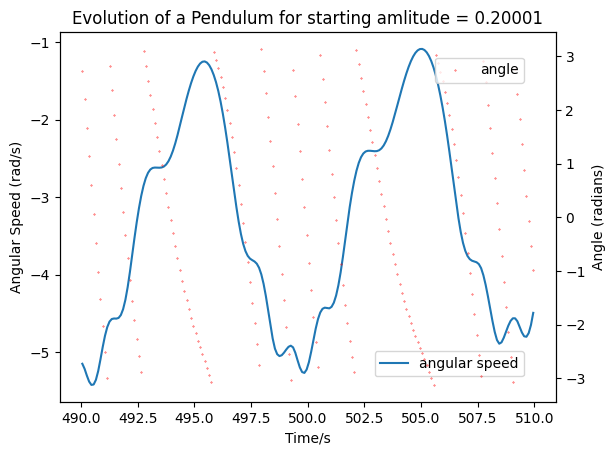

Result of integration over a long time for starting amplide of 0.20001 is -2.036257849578884


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from scipy.integrate import quad

lower_limit = 0
upper_limit = 50

def derivatives(t, y, q, F, omega_0):
  """
  Return derivatives for the pendulum equation at t, y

  The equation is
    d^2 theta/dt^2 = -g/l*sin(theta)-q*d theta/dt+F*sin(Omega_D*t)
  working in the transformed y[0] = theta, y[1] = d(theta)/dt, where g=l
  """
  return [y[1], -np.sin(y[0])-q*y[1]+F*np.sin(omega_0*t)]

omega=2/3

def sol(y_amp, t_in, q_input, F_input):
    solution = scipy.integrate.solve_ivp(
        fun=lambda t, y: derivatives(t, y, q_input, F_input, omega),
        t_span=(0, t_in),
        y0=(y_amp, 0.0),
        t_eval=np.linspace(0, t_in, 10000),
    )
    x, y, dydx = solution.t, solution.y[0], solution.y[1]

    y = np.unwrap(y)

    y = np.mod(y + np.pi, 2 * np.pi) - np.pi

    return x, y, dydx

q_input = 0.0
F_input = 1.2
y_amplitude = [0.2, 0.20001]

for y_amp in y_amplitude:
    x, y, dydx = sol(y_amp, 1000, q_input, F_input)
    fig, ax1 = plt.subplots()
    ax1.plot(x[4900:5100], dydx[4900:5100], label="angular speed")
    ax1.set_xlabel("Time/s")
    ax1.set_ylabel("Angular Speed (rad/s)")
    ax1.set_title(f"Evolution of a Pendulum for starting amlitude = {y_amp}")
    ax1.legend(loc="lower right", bbox_to_anchor=(0.95, 0.05))
    ax2 = ax1.twinx()  # Use second set of axes for angular position
    ax2.scatter(x[4900:5100], y[4900:5100], label="angle", color="red", s=0.1)
    ax2.set_ylabel("Angle (radians)")
    ax2.legend(loc="upper right", bbox_to_anchor=(0.95, 0.95))
    plt.show()
    result, _ = quad(lambda t: np.interp(t, x, y), lower_limit, upper_limit)
    print(f"Result of integration over a long time for starting amplide of {y_amp} is {result}")


This shows that even with very similar starting amplitudes (differ by 0.00001), the solutions diverge, since their integrals over a long period of time are very different, this implies the behaviour is chaotic. You can also see from the plots, that very different behaviour is seen from the two starting amplitudes at 500 seconds.

# Supplementary Task 2:

Plotting angular speed against angule for various solutions to investigate its choatic nature

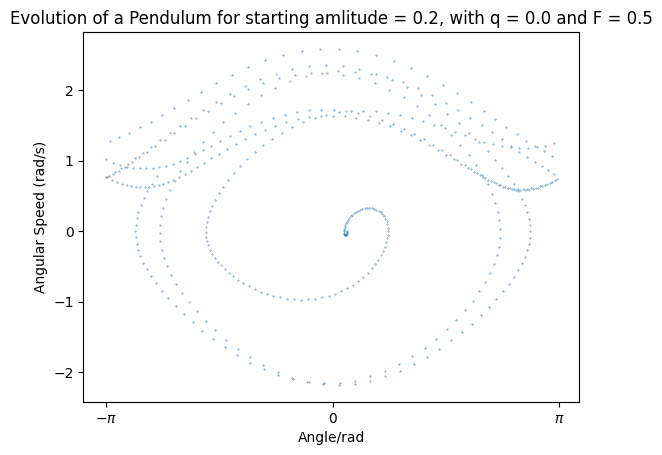

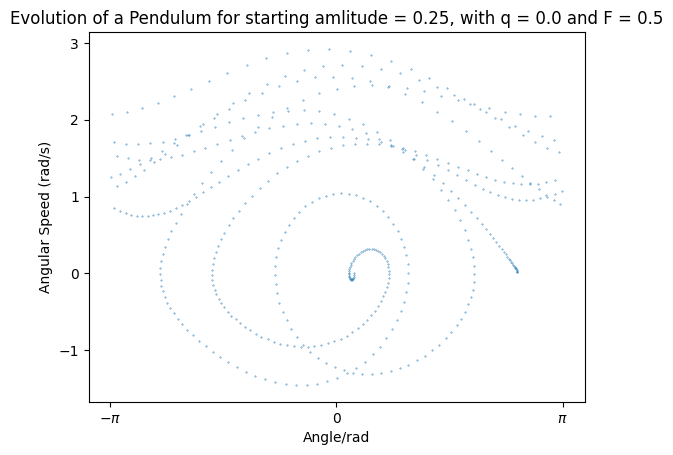

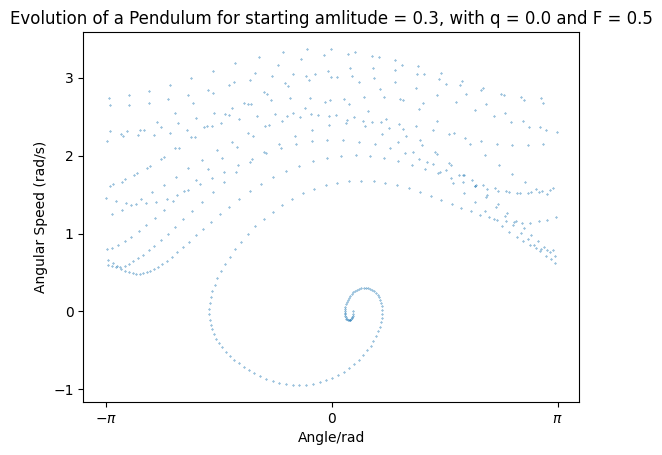

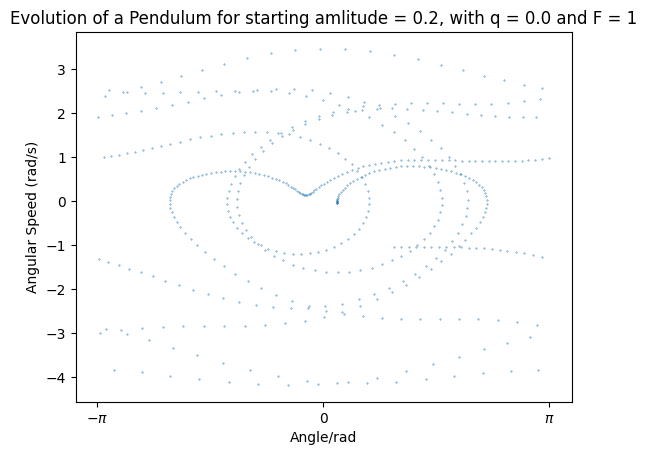

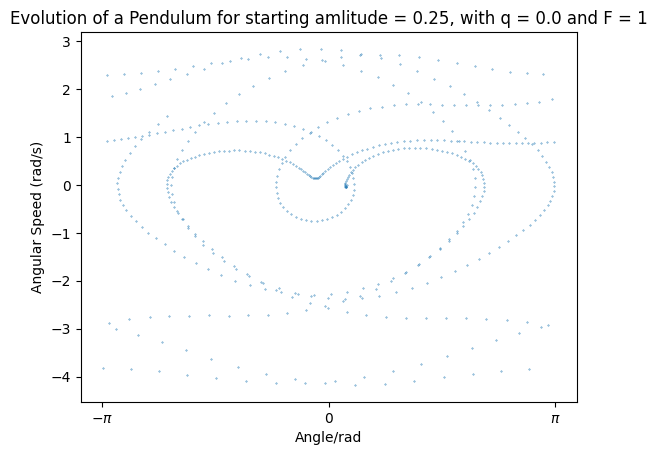

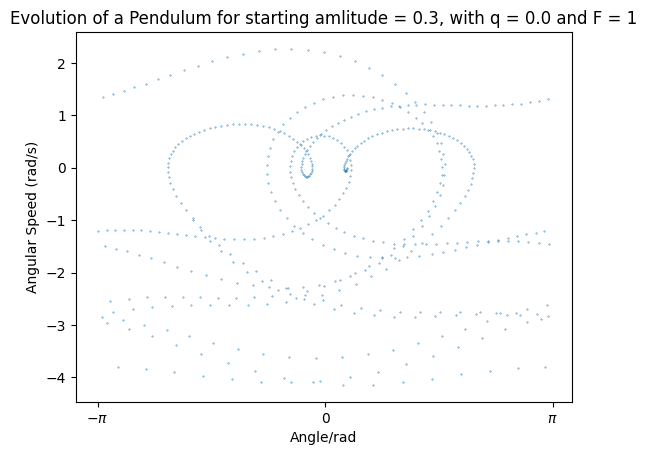

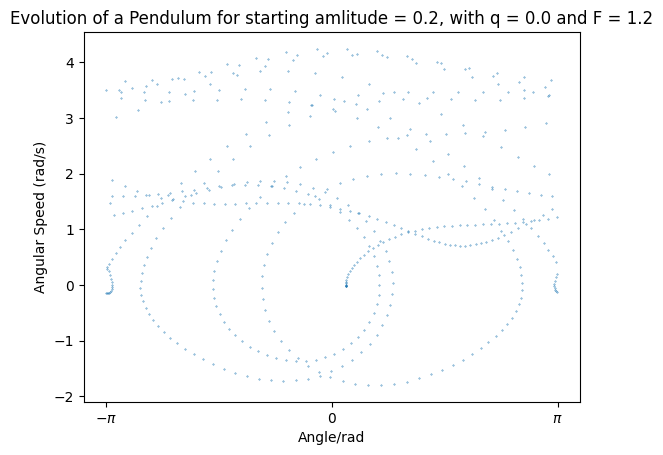

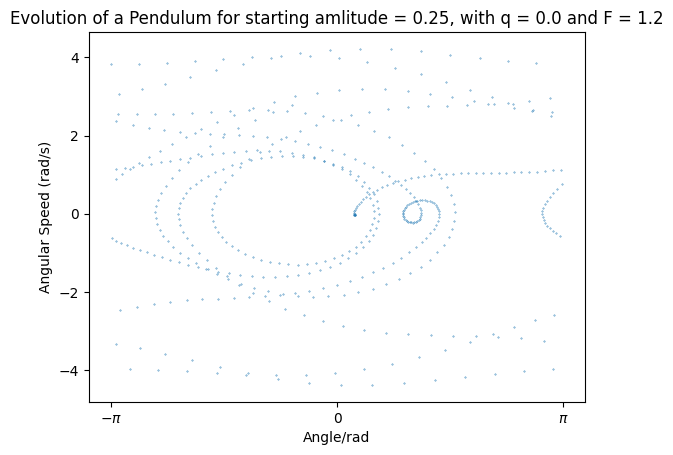

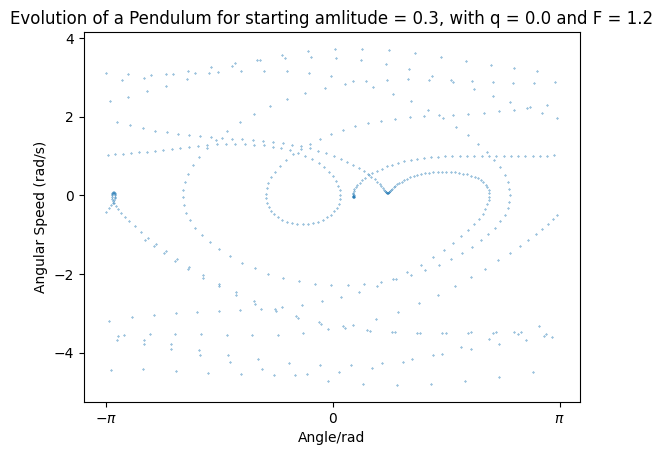

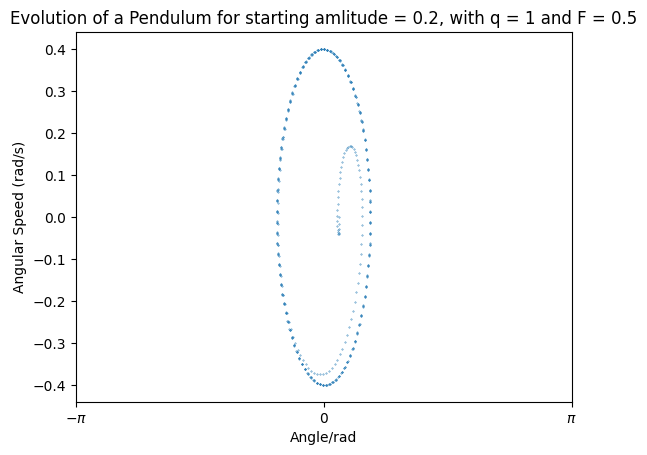

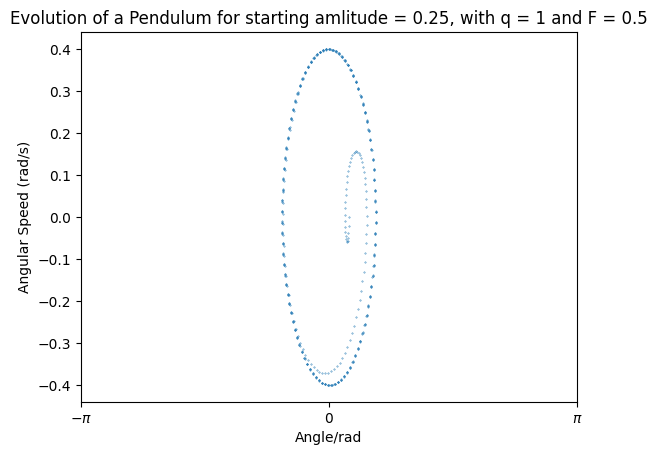

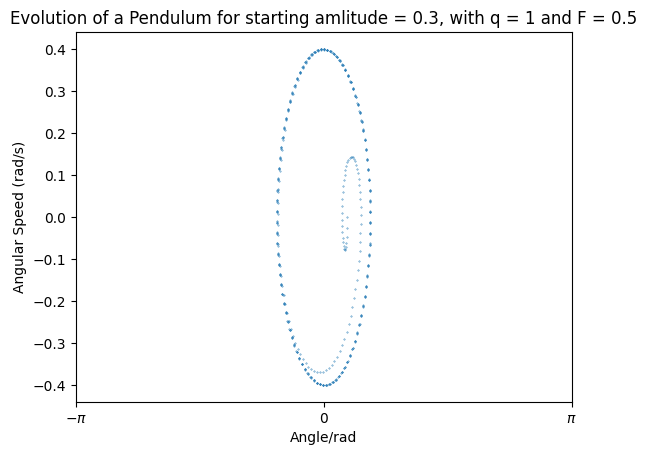

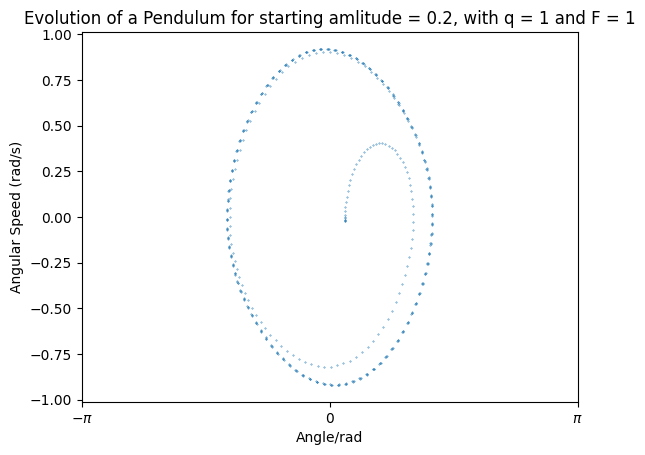

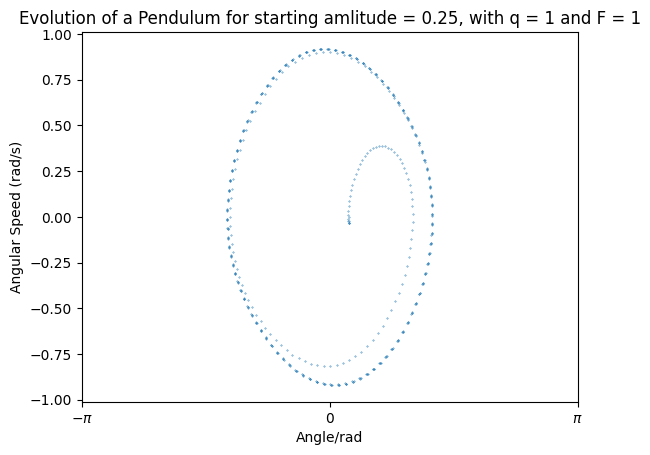

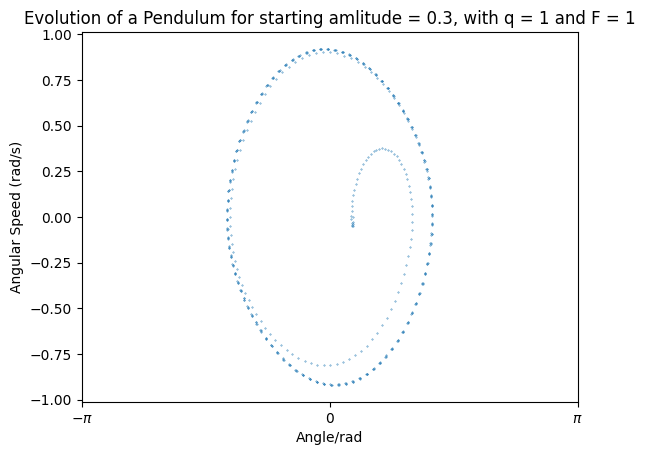

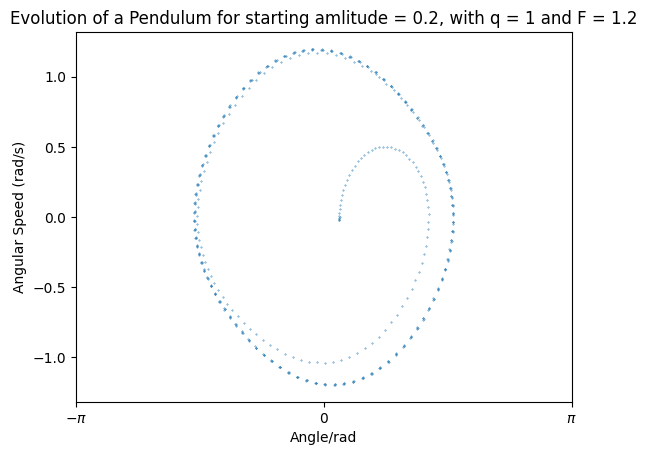

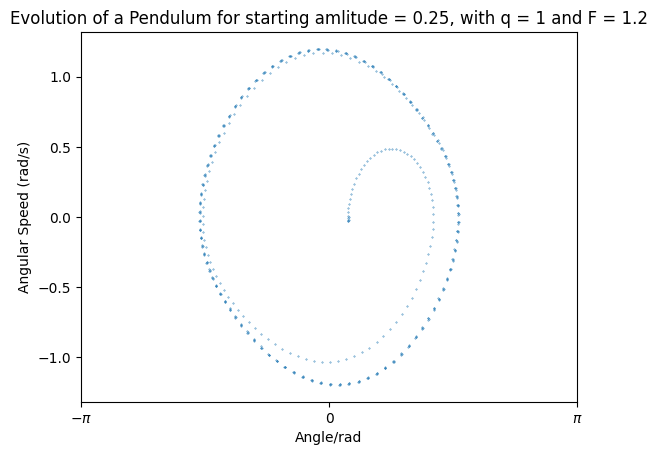

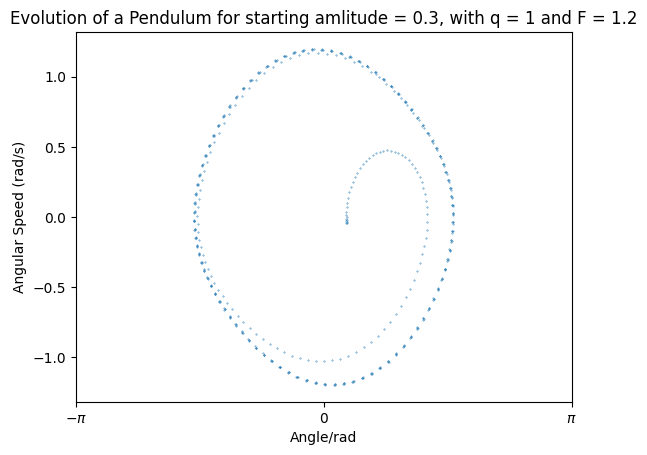

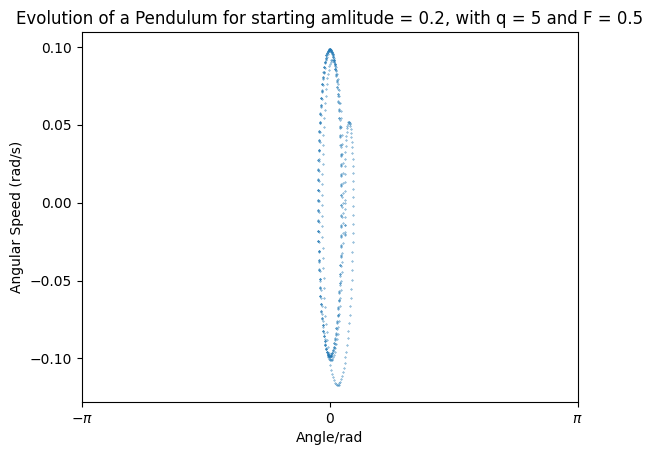

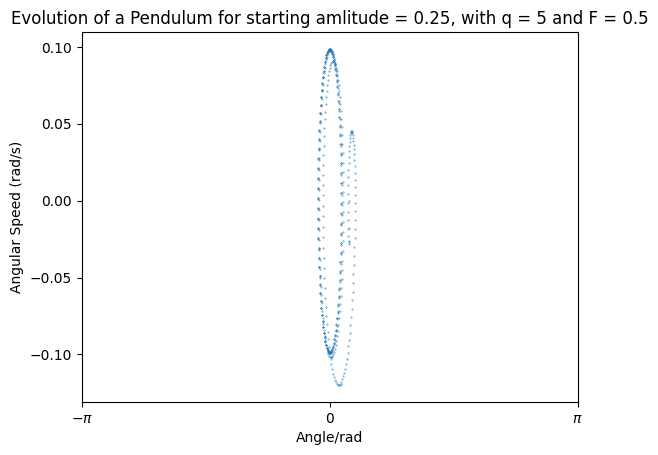

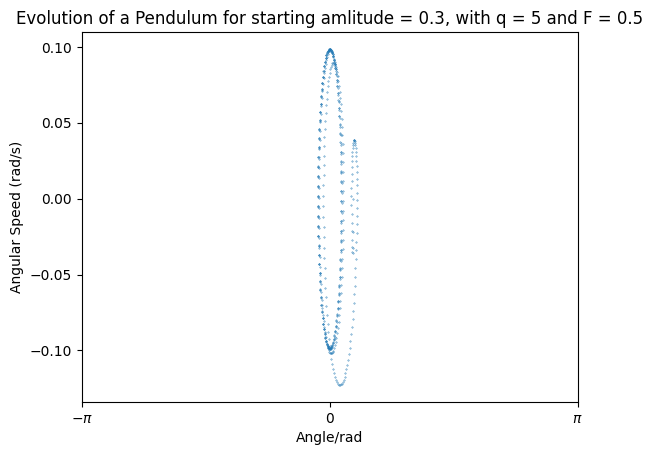

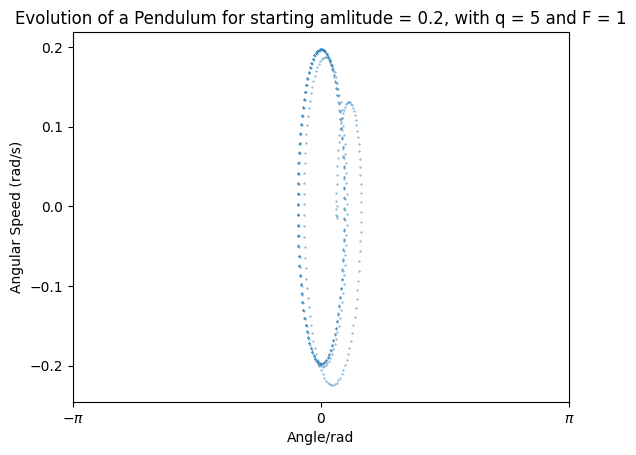

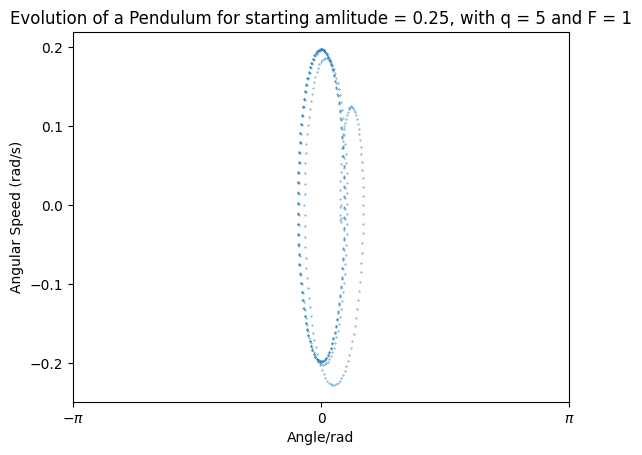

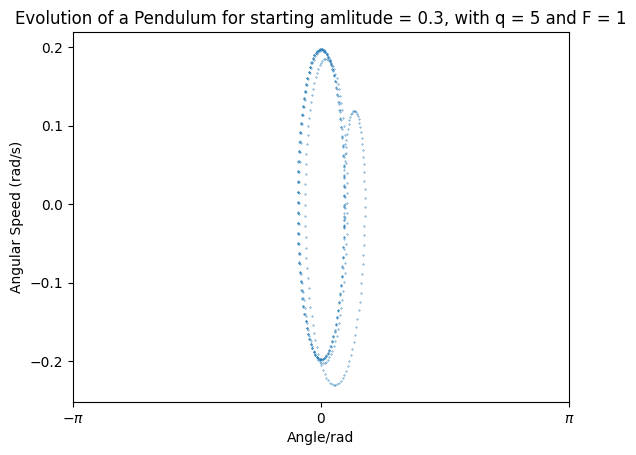

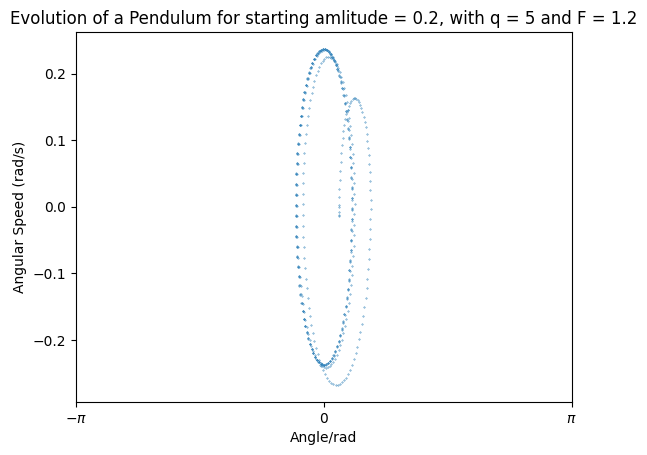

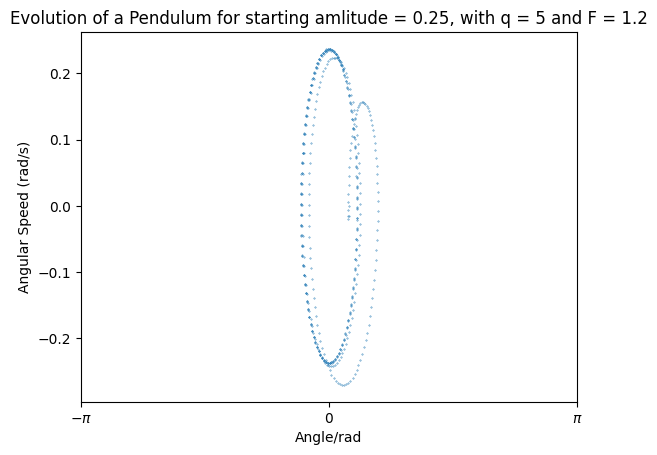

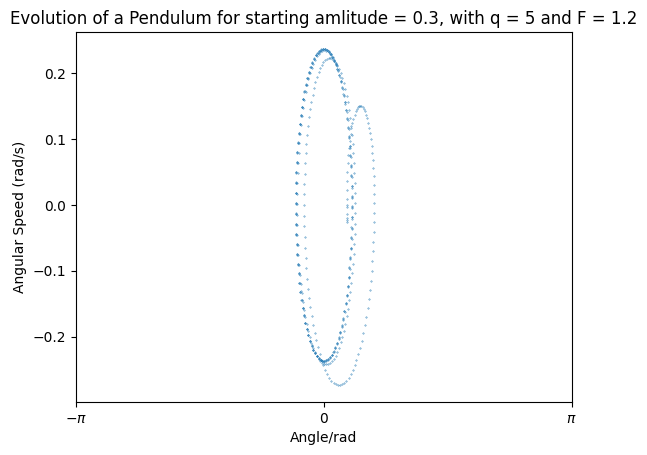

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from scipy.integrate import quad

lower_limit = 0
upper_limit = 1000

def derivatives(t, y, q, F, omega_0):
  """
  Return derivatives for the pendulum equation at t, y

  The equation is
    d^2 theta/dt^2 = -g/l*sin(theta)-q*d theta/dt+F*sin(Omega_D*t)
  working in the transformed y[0] = theta, y[1] = d(theta)/dt, where g=l
  """
  return [y[1], -np.sin(y[0])-q*y[1]+F*np.sin(omega_0*t)]

omega=0.6667

def sol(y_amp, t_in, q_input, F_input):
    solution = scipy.integrate.solve_ivp(
        fun=lambda t, y: derivatives(t, y, q_input, F_input, omega),
        t_span=(0, t_in),
        y0=(y_amp, 0.0),
        t_eval=np.linspace(0, t_in, 500),
    )
    x, y, dydx = solution.t, solution.y[0], solution.y[1]

    y = np.unwrap(y)

    return x, y, dydx

q_input = [0.0, 1, 5]
F_input = [0.5, 1, 1.2]
y_amplitude = [0.2, 0.25, 0.3]
for q in q_input:
  for F in F_input:
    for y_amp in y_amplitude:
        x, y, dydx = sol(y_amp, 50, q, F)
        y_modulated = np.mod(y, 2*np.pi)
        y_modulated[y_modulated > np.pi] -= 2*np.pi
        fig, ax1 = plt.subplots()
        ax1.scatter(y_modulated, dydx, label="angular speed", s=0.1)
        ax1.set_xlabel("Angle/rad")
        ax1.set_ylabel("Angular Speed (rad/s)")
        ax1.set_title(f"Evolution of a Pendulum for starting amlitude = {y_amp}, with q = {q} and F = {F}")
        tick_locations = np.array([-np.pi, 0, np.pi])
        tick_labels = [r'$-\pi$', '0', r'$\pi$']
        plt.xticks(tick_locations, tick_labels)
        plt.show()


These plots show that the pendulum has a chaotic nature when F > q, however the pendulum is far more stable when F < q or even F = q.